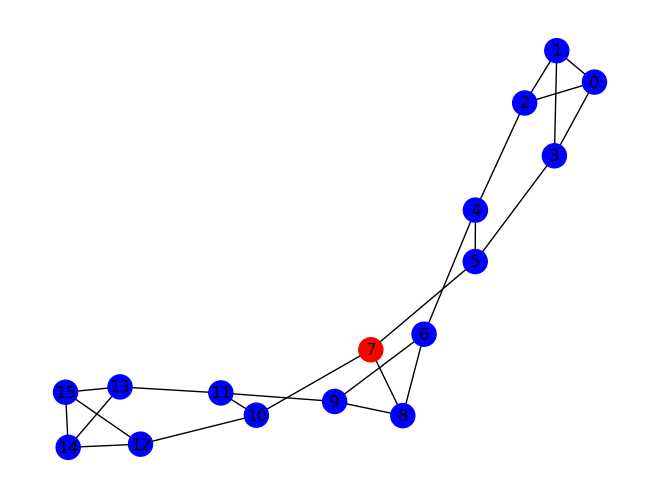

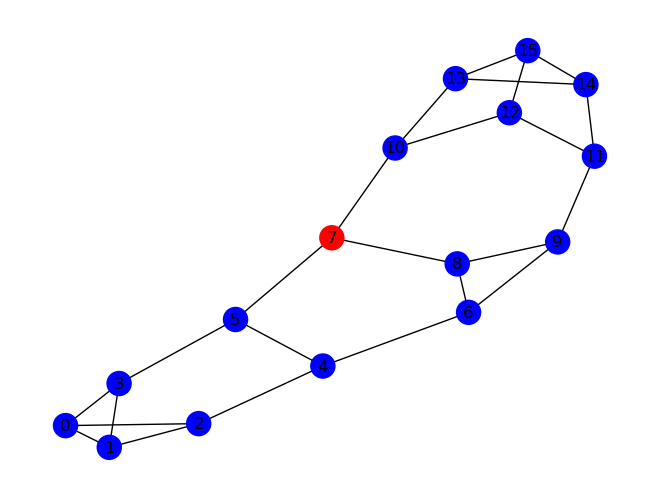

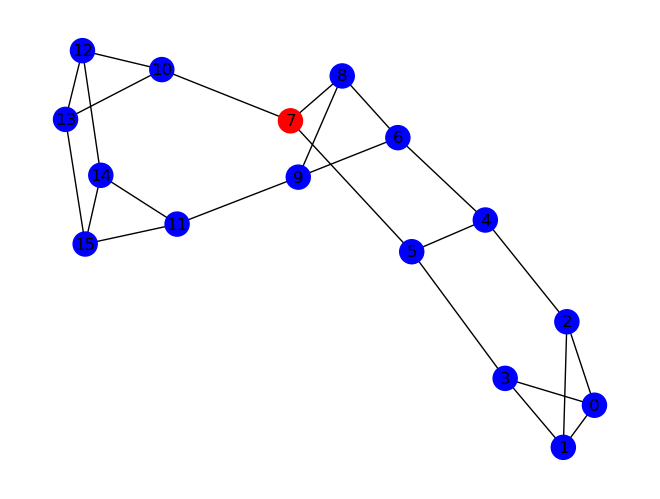

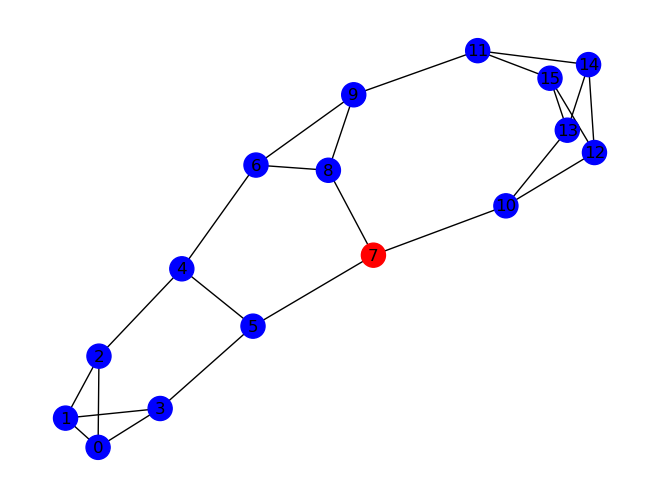

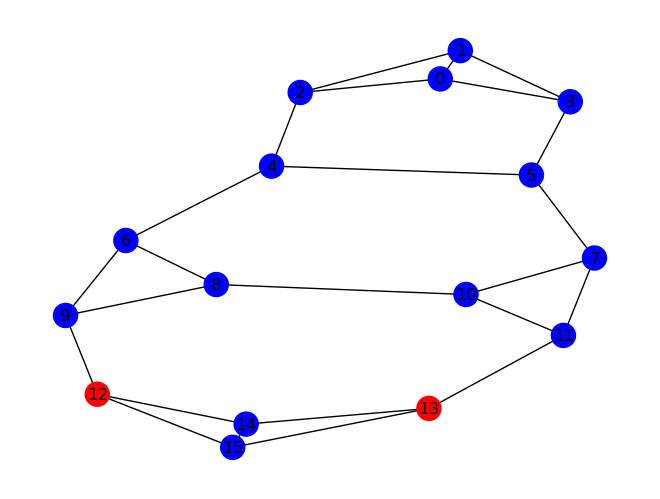

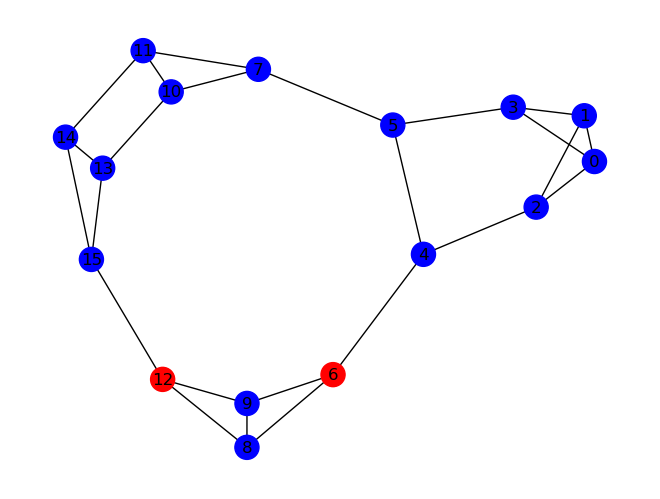

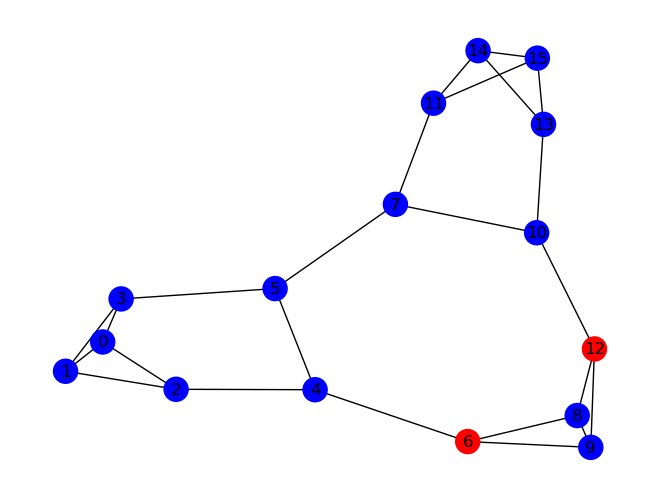

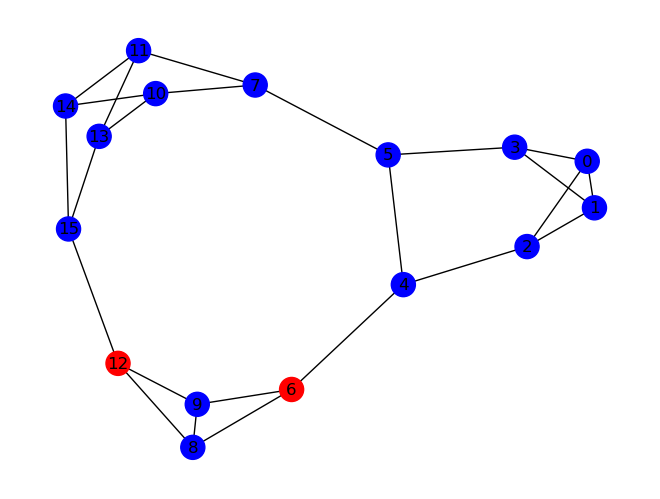

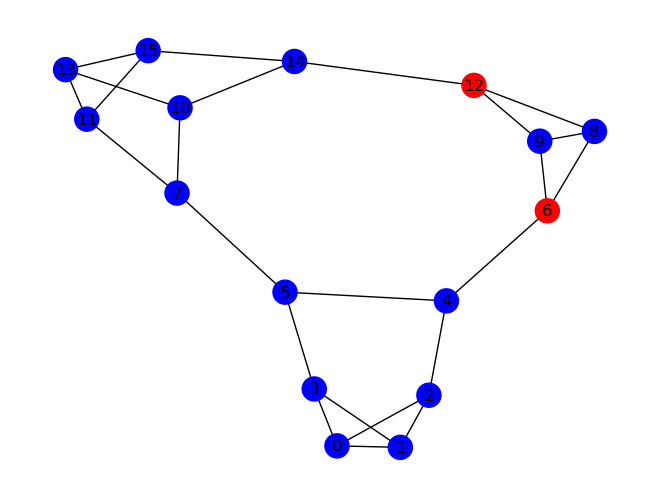

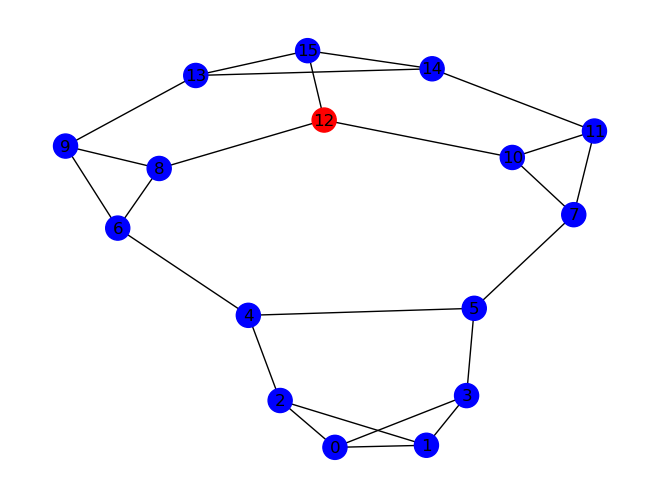

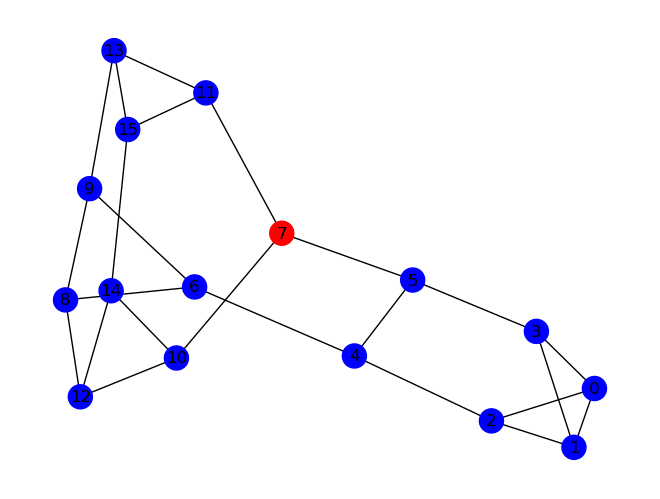

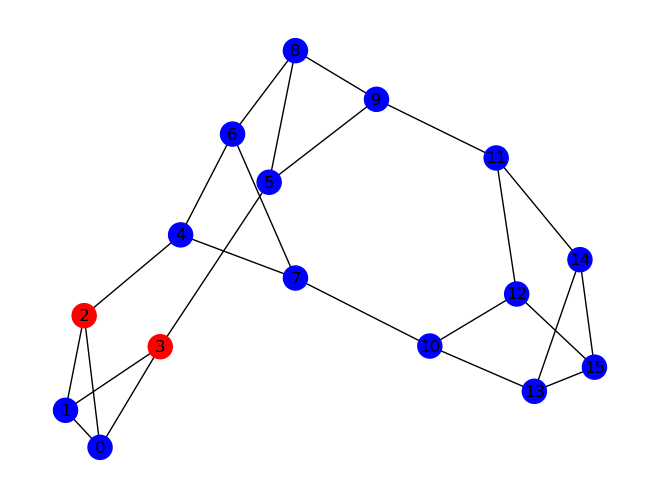

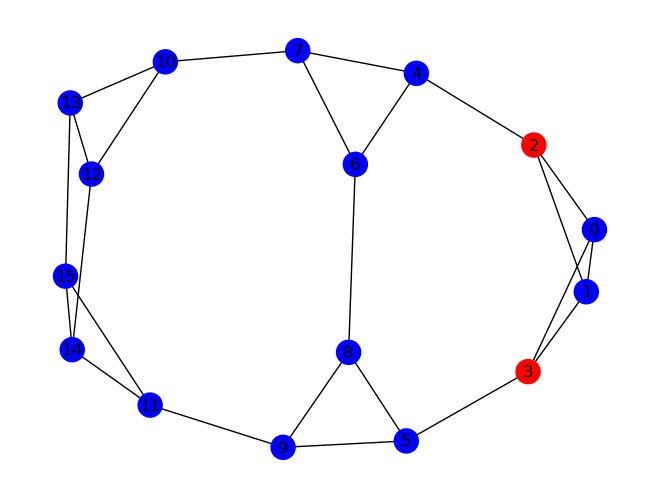

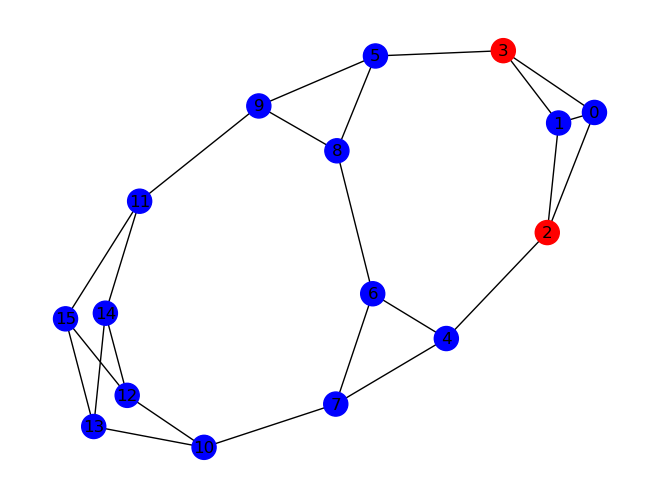

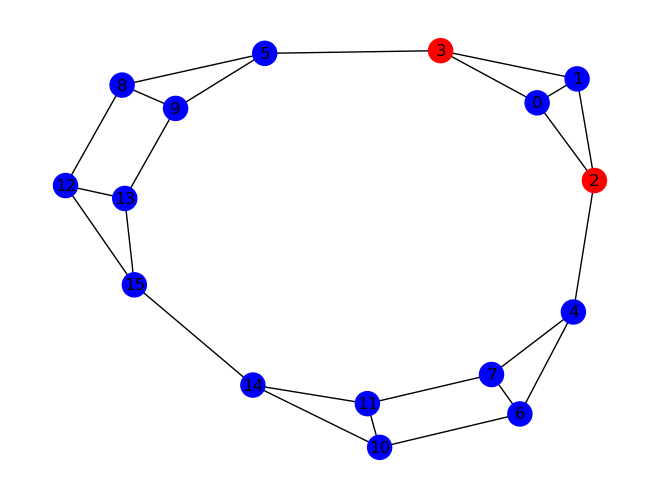

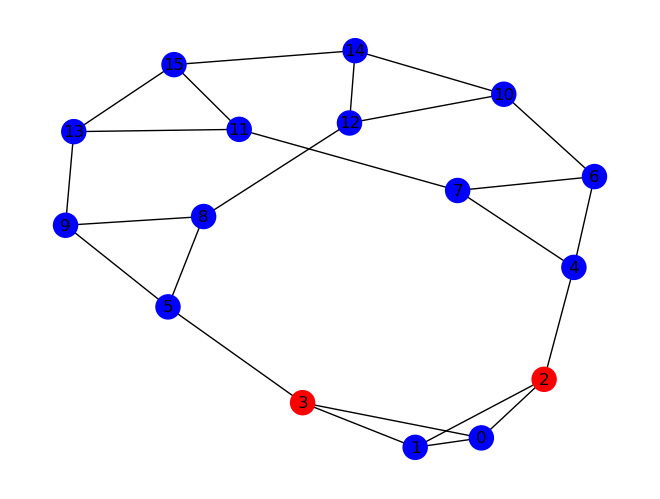

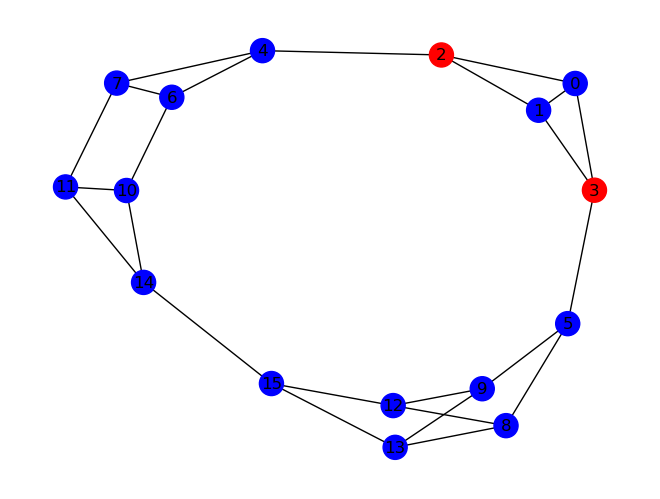

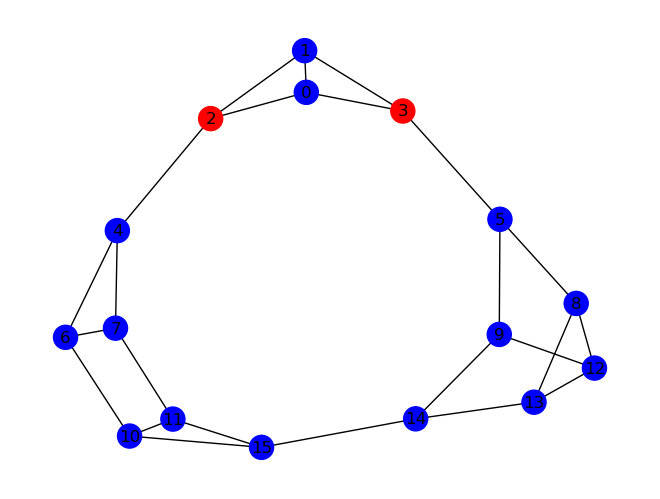

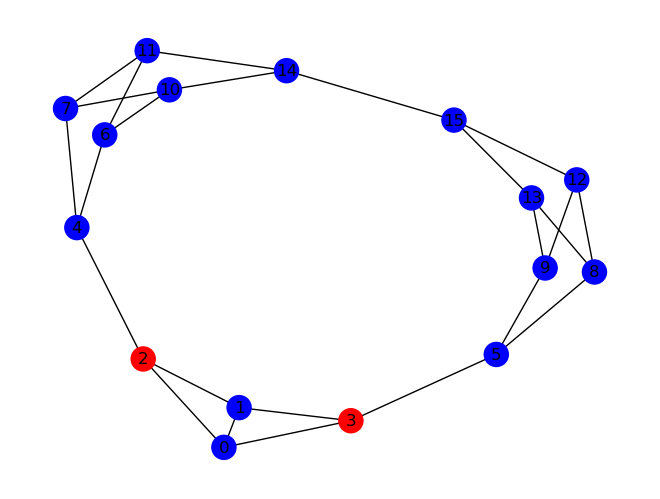

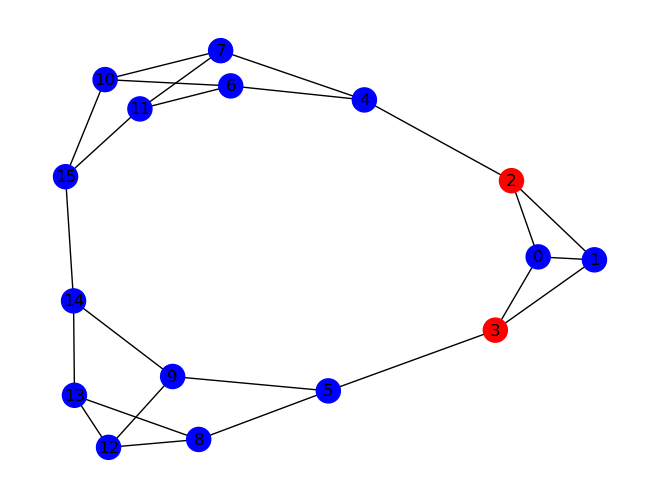

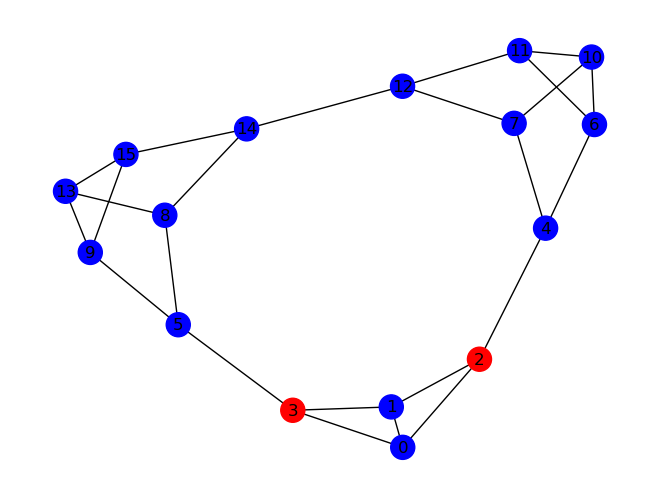

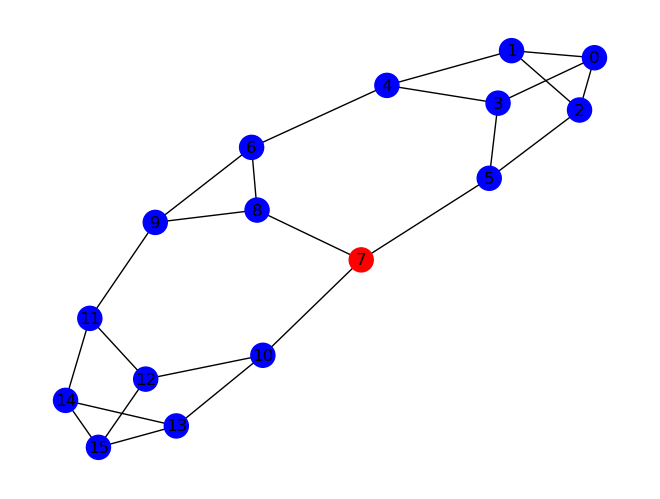

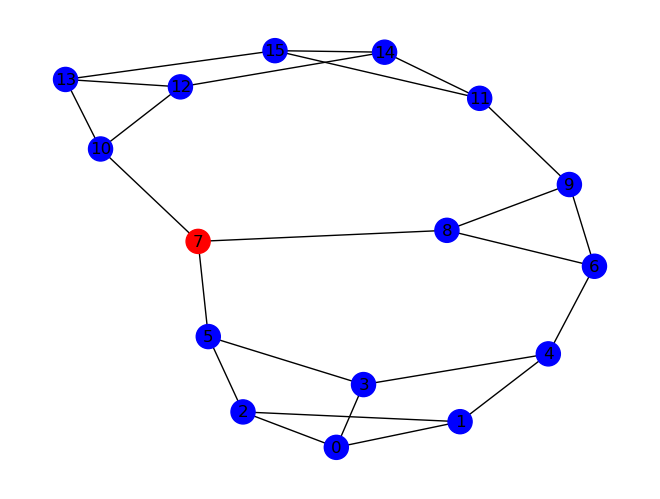

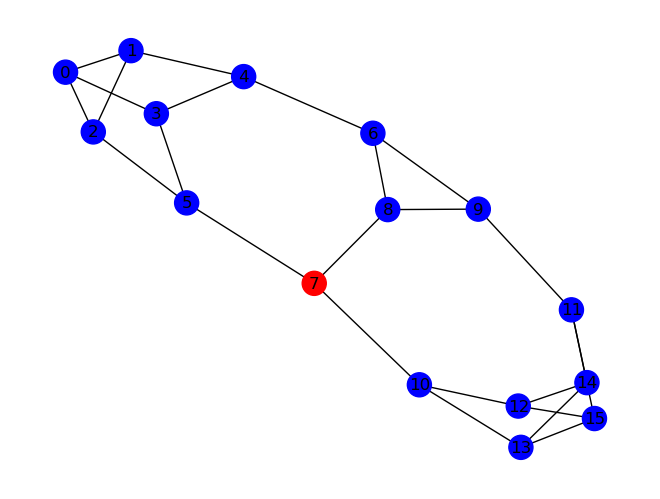

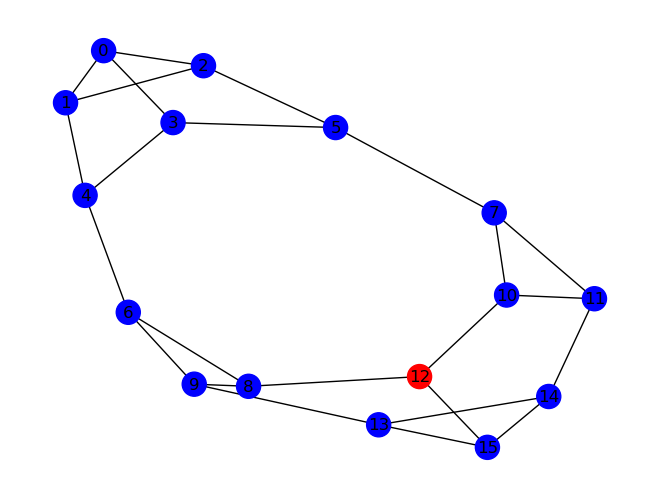

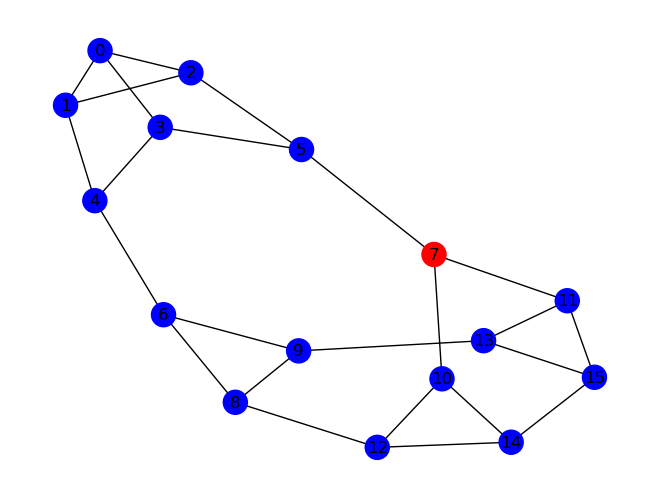

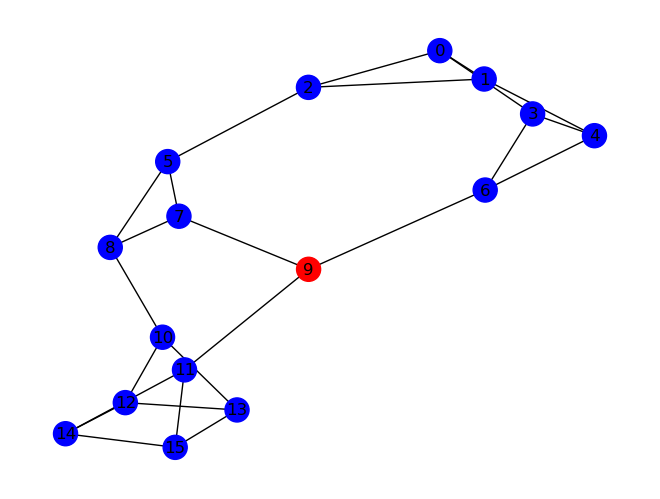

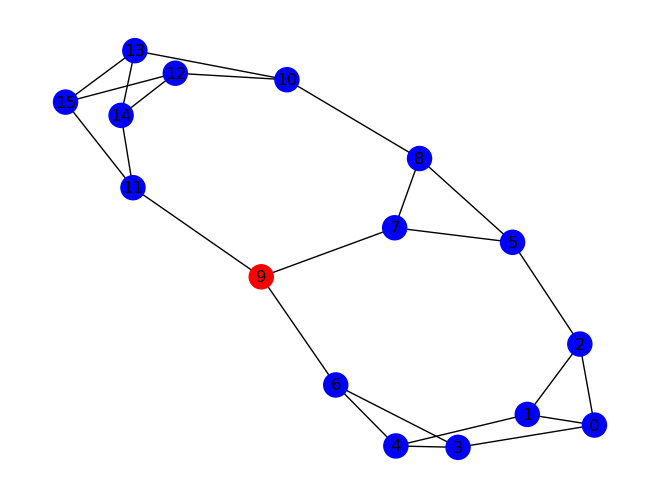

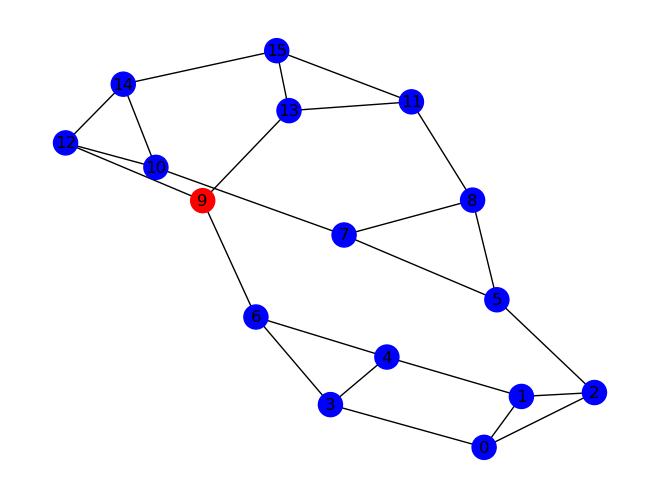

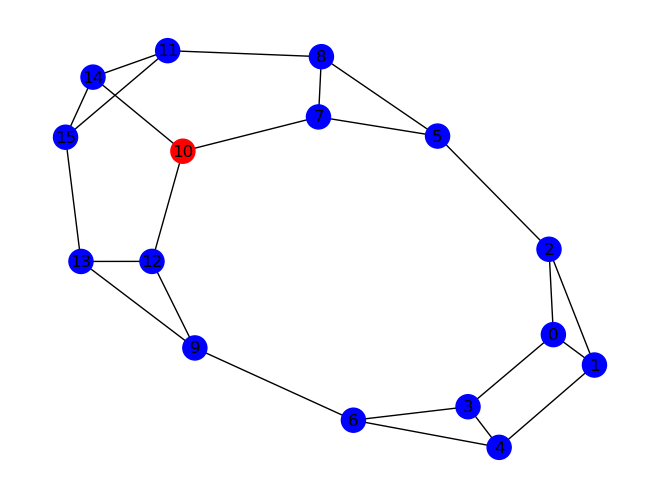

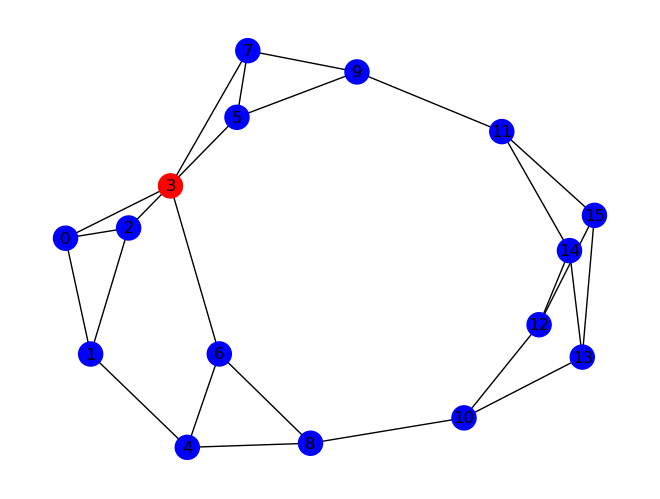

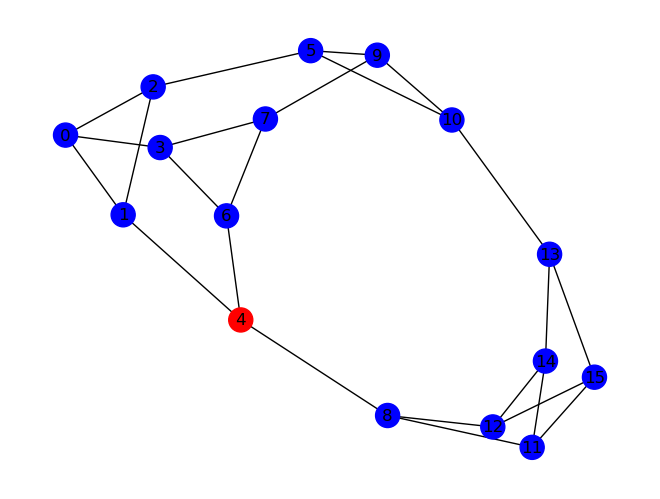

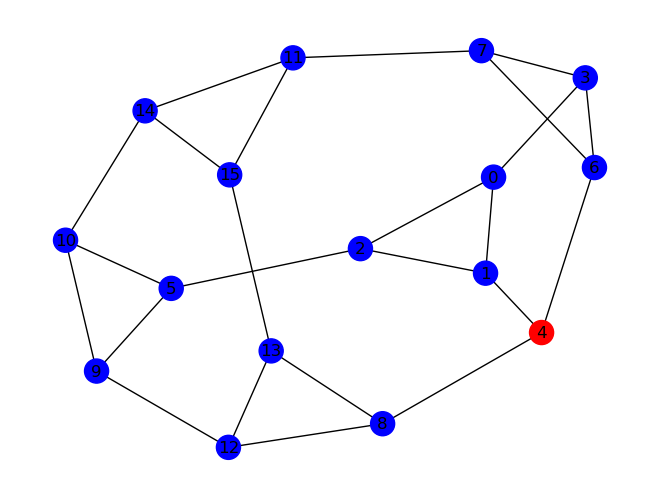

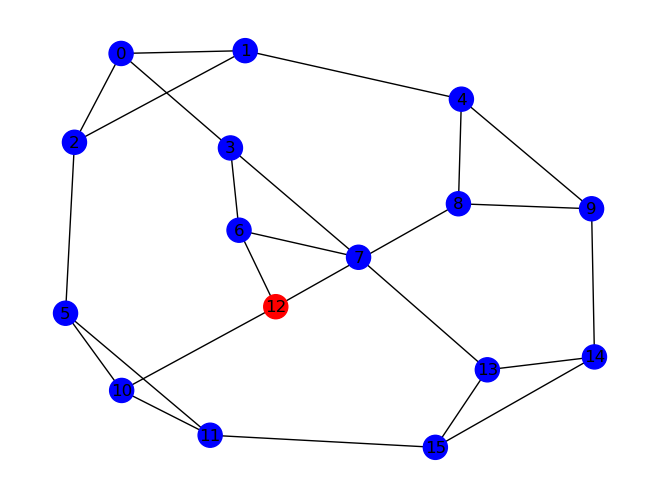

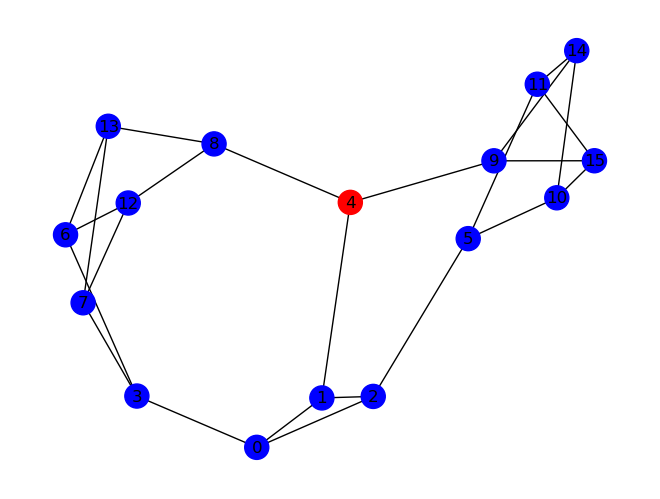

Number of graphs with MFVS-essential vertices 0


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import os

essential_graphs = 0

def is_fvs(G, subset):
    """
    Check if removing the vertices in subset breaks all cycles (i.e., graph becomes acyclic).
    """
    H = G.copy()
    H.remove_nodes_from(subset)
    return nx.is_forest(H)  # True if no cycles remain

def find_minimum_fvs_bitmasks(G):
    """
    Enumerates all subsets and returns all MFVSs in bitmask form.
    """
    n = len(G.nodes())
    nodes = list(G.nodes())
    best_size = None
    min_fvs_masks = []

    for r in range(1, n + 1):
        for combo in itertools.combinations(nodes, r):
            if is_fvs(G, combo):
                if best_size is None:
                    best_size = r
                if r == best_size:
                    # Convert to bitmask
                    mask = 0
                    for v in combo:
                        mask |= (1 << nodes.index(v))
                    min_fvs_masks.append(mask)
        if best_size is not None:
            break

    return min_fvs_masks, nodes

def draw_graph_with_highlight(G, nodes, union_mask, intersection_mask):
    """
    Draws the graph: nodes missing in the union (never in any FVS) are red, others blue.
    """
    colors = []
    has_essential = 0
    for i, v in enumerate(nodes):
        if intersection_mask & (1 << i):
            has_essential = 1
            colors.append("green") # appears in every FVS
        elif union_mask & (1 << i):
            colors.append("blue")  # appears in some MFVS
        else:
            colors.append("red")   # never appears in any MFVS
    global essential_graphs
    essential_graphs += has_essential
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=colors)
    plt.show()

def process_g6_files(file_list):
    for filename in file_list:
        with open(filename, "rb") as f:
            graphs = nx.read_graph6(f)

        for G in graphs:
            if nx.has_bridges(G):
                continue
            min_fvs_masks, nodes = find_minimum_fvs_bitmasks(G)

            if not min_fvs_masks:
                continue

            full_mask = (1 << len(nodes)) - 1
            # OR and AND all masks together
            union_mask = 0
            intersection_mask = full_mask
            for mask in min_fvs_masks:
                union_mask |= mask
                intersection_mask &= mask

            if union_mask != full_mask or intersection_mask:
                draw_graph_with_highlight(G, nodes, union_mask, intersection_mask)

# Example usage:
file_list = ["datasets/cub16.g6"]  # modify with your actual g6 files
process_g6_files(file_list)
print(f"Number of graphs with MFVS-essential vertices {essential_graphs}")
